In [1]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[0.02325293] -1.6304905687983862


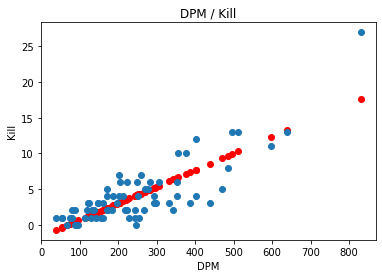

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/LOL_rank.csv')

#df.head()
X = df[df['Lane'] == 'Top']
X = X['DPM']
#print(X)
Y = df[df['Lane'] == 'Top']
Y = Y['Kill']
plt.title('DPM / Kill')
plt.xlabel('DPM')
plt.ylabel('Kill')
plt.plot(X,Y, 'o')
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), Y)
y_predicted = line_fitter.predict(X.values.reshape(-1,1))
plt.scatter(X,y_predicted, c='r')
print(line_fitter.coef_, line_fitter.intercept_)

[0.02208163] 0.1687557242012252


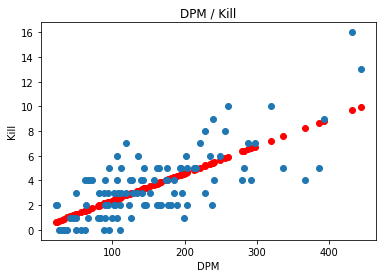

In [5]:
X = df[df['Lane'] == 'Jungle']
X = X['DPM']
#print(X)
Y = df[df['Lane'] == 'Jungle']
Y = Y['Kill']
plt.title('DPM / Kill')
plt.xlabel('DPM')
plt.ylabel('Kill')
plt.plot(X,Y, 'o')
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), Y)
y_predicted = line_fitter.predict(X.values.reshape(-1,1))
plt.scatter(X,y_predicted, c='r')
print(line_fitter.coef_, line_fitter.intercept_)

[[5.26001136]]


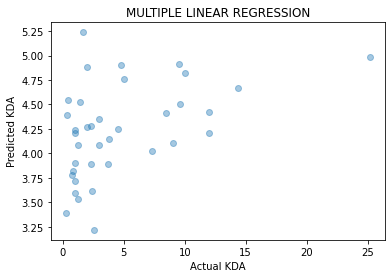

In [6]:
from sklearn.model_selection import train_test_split
# Multiple Linear Regression
df_ecs = df[df['Lane'] != 'Support']
x = df_ecs[['Playing Time', 'Damage', 'CS']]
y = df_ecs[['KDA']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)
mrg = LinearRegression()
mrg.fit(x_train, y_train)
virtual_data = [[25, 20000, 180]]
predict_data = mrg.predict(virtual_data)
print(predict_data)
# x의 테스트 데이터 x_test를 넣어 예측한 값들을 y_predict라 선언
y_predict = mrg.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual KDA")
plt.ylabel("Predicted KDA")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

[[7.50960547]]


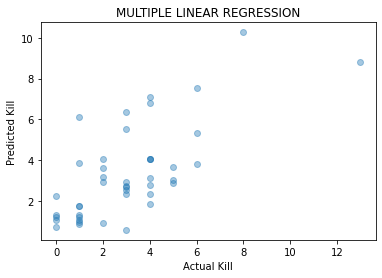

[[-0.09041228  0.00042374 -0.00366626]] [1.95512891]


In [71]:
from sklearn.model_selection import train_test_split
# Multiple Linear Regression
x = df[['Playing Time', 'Damage', 'CS']]
y = df[['Kill']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)
mrg = LinearRegression()
mrg.fit(x_train, y_train)
virtual_data = [[25, 20000, 180]]
predict_data = mrg.predict(virtual_data)
print(predict_data)
# x의 테스트 데이터 x_test를 넣어 예측한 값들을 y_predict라 선언
y_predict = mrg.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Kill")
plt.ylabel("Predicted Kill")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mrg.coef_, mrg.intercept_)

In [10]:
# Logistic Regression
# Win-Lose 열에서 승을 1 패를 0으로 변경
df['Win-Lose'] = df['Win-Lose'].replace(['Win', 'Lose'], [1, 0])
# 승패에 관련이 있을 것이라 예상되는 KDA, DPM, CS를 선택
feats = df[['KDA', 'DPM', 'CS']]
wl = df['Win-Lose']
train_feats, test_feats, train_wl, test_wl = train_test_split(feats, wl)
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_feats = scaler.fit_transform(train_feats)
test_feats = scaler.transform(test_feats)

from sklearn.linear_model import LogisticRegression
Lor = LogisticRegression()
Lor.fit(train_feats, train_wl)
print(Lor.score(train_feats, train_wl))
print(Lor.score(test_feats, test_wl))
print(Lor.coef_)

0.8220858895705522
0.8727272727272727
[[2.82457771 0.18624795 0.05352452]]


In [11]:
data1 = np.array([4, 400, 200])
data2 = np.array([3.0, 300, 200])
data3 = np.array([2.5, 400, 220])
sample_datas = np.array([data1, data2, data3])
sample_datas = scaler.transform(sample_datas)
print(Lor.predict(sample_datas))
print(Lor.predict_proba(sample_datas))

[1 1 0]
[[0.27996585 0.72003415]
 [0.48735249 0.51264751]
 [0.53627368 0.46372632]]


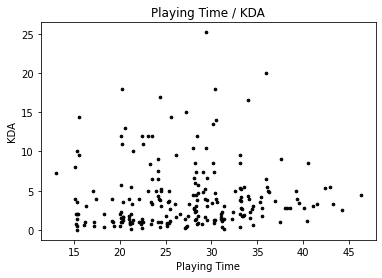

In [48]:
# Clustering
# 데이터 로드, 선점도 그래프
X = df.iloc[:,[4,8]].values
plt.scatter(X[:,0], X[:,1], c='black', s=7, label='LOL Data')
plt.xlabel('Playing Time')
plt.ylabel('KDA')
plt.title('Playing Time / KDA')
plt.show()

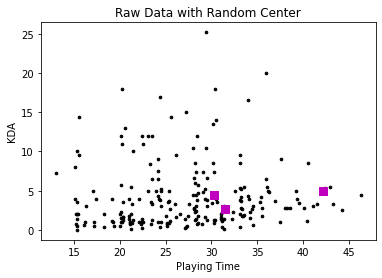

In [57]:
# Parameter setting
K = 3
N = X.shape[0]
C = X.shape[1]
# Initalization of centers
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
centers = np.random.randn(K, C)*std+mean
# Scatter plot (Initial Center)
colors = ['r', 'g', 'b']
plt.scatter(X[:,0], X[:,1], c='black', s=7, label='LOL Data')
plt.scatter(centers[:,0], centers[:,1], marker='s', s=50, c='m', label='Center')
plt.title('Raw Data with Random Center')
plt.xlabel('Playing Time')
plt.ylabel('KDA')
plt.show()

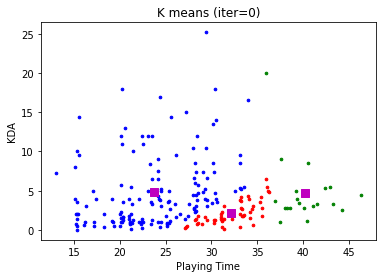

Iteration = 0
[[32.12921569  2.16705882]
 [40.219       4.7265    ]
 [23.73707483  4.89646259]]


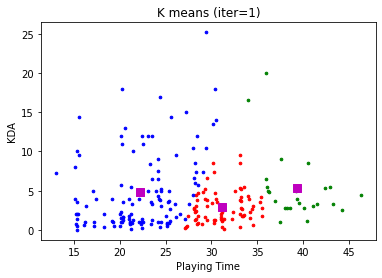

Iteration = 1
[[31.14648649  2.90135135]
 [39.3204      5.3132    ]
 [22.22243697  4.8512605 ]]


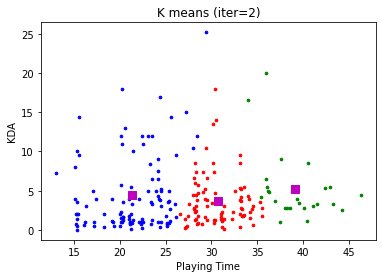

Iteration = 2
[[30.68712644  3.66885057]
 [39.17        5.26923077]
 [21.37257143  4.4632381 ]]


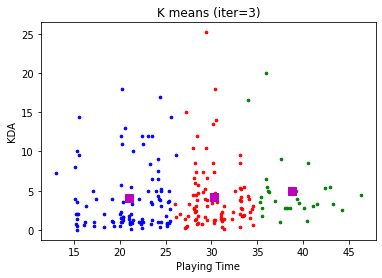

Iteration = 3
[[30.31811111  4.20777778]
 [38.78758621  5.00517241]
 [20.99848485  4.05030303]]


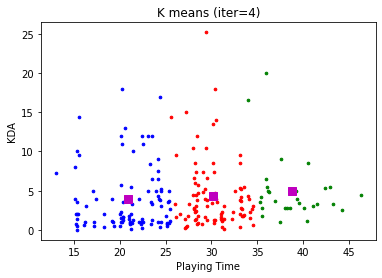

Iteration = 4
[[30.22119565  4.37608696]
 [38.78758621  5.00517241]
 [20.89824742  3.88742268]]


In [58]:
import copy
# Set the variables for K-means clustering
centers_old = np.zeros(centers.shape)
centers_new = copy.deepcopy(centers)
clusters = np.zeros(N)
distances = np.zeros((N,K))
# K-means clustering loop
MAXiter = 5
for iter in range(MAXiter):
  # calculate the distance between centers and data
  for i in range(K):
    distances[:,i] = np.linalg.norm(X-centers_new[i], axis=1)
  # assign data to closest center
  clusters = np.argmin(distances, axis=1)
  # keep old center position
  centers_old = copy.deepcopy(centers_new)
  # calculate new centers
  for i in range(K):
    centers_new[i] = np.mean(X[clusters==i], axis=0)
    # scatter plot centers and data
    plt.scatter(X[clusters==i,0], X[clusters==i,1], s=7 , c=colors[i])
    plt.scatter(centers_new[i,0], centers_new[i,1], marker='s', s=50 , c ='m')
    plt.title('K means (iter={})'.format(iter))
  plt.xlabel('Playing Time'); plt.ylabel('KDA');
  plt.show()
  print('Iteration = {}'.format(iter))
  print(centers_new)


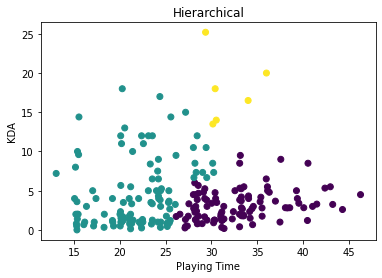

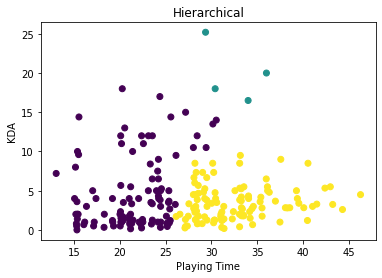

In [81]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('Hierarchical')
plt.xlabel('Playing Time')
plt.ylabel('KDA')
plt.show()
ac2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = ac2.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('Hierarchical')
plt.xlabel('Playing Time')
plt.ylabel('KDA')
plt.show()

In [9]:
df.head()

,Champion,Lane,Team,Win-Lose,Playing Time,Kill,Death,Assisst,KDA,Damage,DPM,CS,CS per Min
0,Kennen,Top,Red,1,21.04,5,4,2,1.75,10172,169.5,107,5.1
1,Garen,Top,Blue,1,19.20,2,1,2,4.00,8174,136.2,160,8.3
2,Malphite,Top,Red,0,15.32,0,4,0,0.00,5758,96.0,93,6.1
3,Amumu,Jungle,Blue,1,39.40,13,6,11,4.00,26604,443.4,228,5.8
4,Graves,Jungle,Red,1,28.59,5,3,9,4.67,16911,281.9,213,7.5
